<a href="https://colab.research.google.com/github/FahruddinZaimIbrahim/PCVK_Ganjil_2024/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

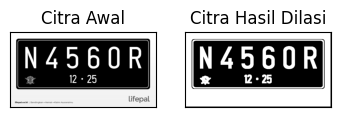

In [ ]:
#Dilasi tanpa library

def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  SED= np.ones((w,w), dtype=np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-
constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

[[1 1 1]
 [1 1 1]
 [1 1 1]]


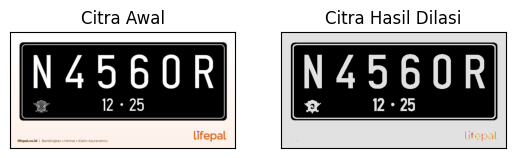

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg')
#img = cv2.imread('morp.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint16)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)
print(kernel)

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

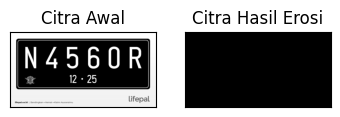

In [ ]:
#Erosi Tanpa Library

def erosi_citra(F,k):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE= np.ones((k,k), dtype=np.uint8)
  constant= (k-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)

  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-
constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)
    return imgE

img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 175, 225,
cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)
plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

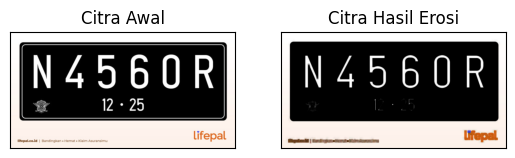

In [ ]:
#EROSI LIBRARY
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg')

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

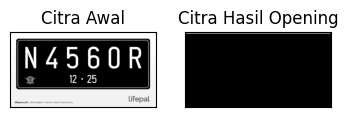

In [ ]:
img_o= cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0) #
reto, thresho = cv2.threshold(img_o, 127, 225,
cv2.THRESH_BINARY)
k=7
imgO = dilasi_citra(erosi_citra(thresho,k),k)

plt.subplot(131),plt.imshow(img_o,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgO,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

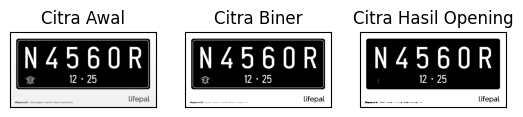

In [ ]:
#Dengan Menggunakan Library
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
openn = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(openn,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]),
plt.yticks([])

plt.show()

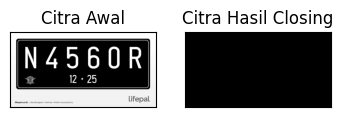

In [ ]:
img_c= cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0) #
retc, threshc = cv2.threshold(img_c, 127, 225,
cv2.THRESH_BINARY)
k=7
imgC = erosi_citra(dilasi_citra(threshc,k),k)

plt.subplot(131),plt.imshow(img_c,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgC,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]),
plt.yticks([])
plt.show()

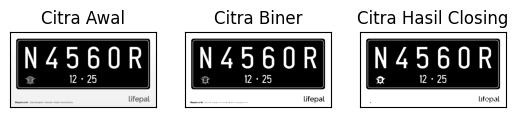

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
closs = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(closs,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])

plt.show()

SED = Cross 3


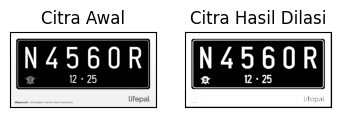

SED = Cross 5


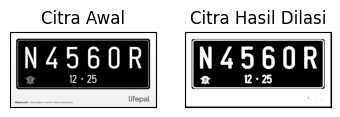

In [ ]:
#Dilasi Cross SED

def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]], dtype = np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-
constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD
print('SED = Cross 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,
cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [1, 1, 1, 1, 1],
                  [0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0]], dtype = np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-
constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD
print('SED = Cross 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,
cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

SED = Circle 3


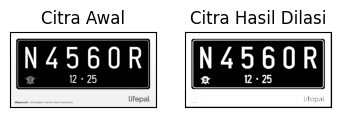

SED = Circle 5


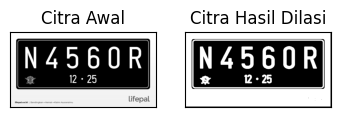

In [ ]:
#Dilasi Circular SED

def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w,w))
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-
constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD
print('SED = Circle 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,
cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

print('SED = Circle 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,
cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

SE = Rectangle 3x5


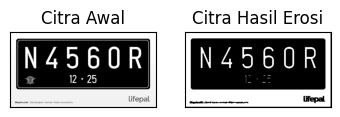

SE = Rectangle 5x7


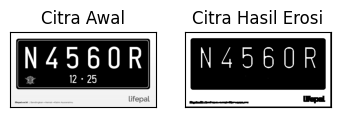

In [ ]:
#Erosi Cross SE

def erosi_citra(F,p,l):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_RECT,(p,l)) #SE persegi panjang
  constant1= (l-1)//2
  constant2= (p-1)//2
  # print(SE)
  imgE= np.zeros((m,n), dtype=np.uint8)

  #Proses Erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j]= np.min(product)
  return imgE
print('SE = Rectangle 3x5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=5
l=3
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SE = Rectangle 5x7')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=7
l=5
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

SE = Line Vertikal 3


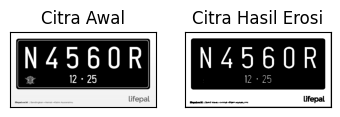

SE = Line Vertikal 5


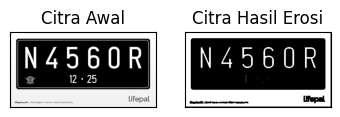

In [ ]:
#Erosi Line Vertikal SE

def erosi_citra(F,k):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,k)) #SE line vertikal
  constant= (k-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)

  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-
constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)
  return imgE
print('SE = Line Vertikal 3')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225,
cv2.THRESH_BINARY)
k=3
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

print('SE = Line Vertikal 5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225,
cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

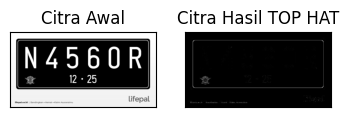

In [ ]:
# Getting the kernel to be used in Top-Hat
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,
                                   filterSize)

# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Top-Hat operation
tophat_img = cv2.morphologyEx(img,
                              cv2.MORPH_TOPHAT,
                              kernel)

#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()

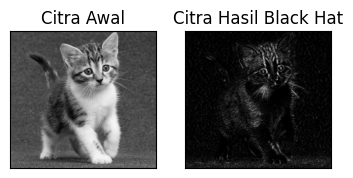

In [ ]:
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Black-Hat operation
#tophat_img = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)
#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blackhat,cmap = 'gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

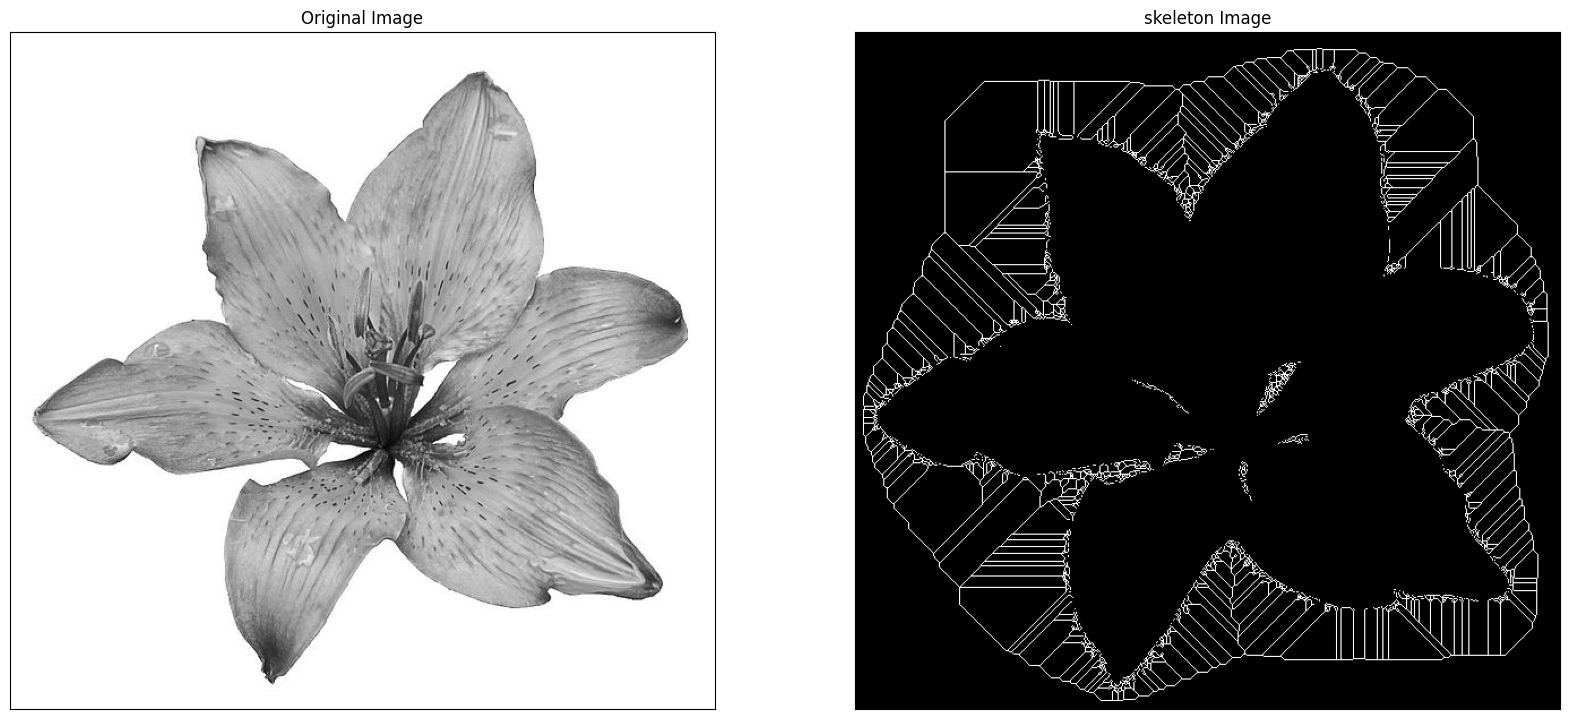

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

# read image
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg',0)

binary = img > filters.threshold_triangle(img)

# true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

# skeletonize image
skeleton = skeletonize(binary_cp)

# print images
plt.figure(figsize=(20,20))

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])

plt.savefig("binary and bin_skeleton.png")
plt.show()

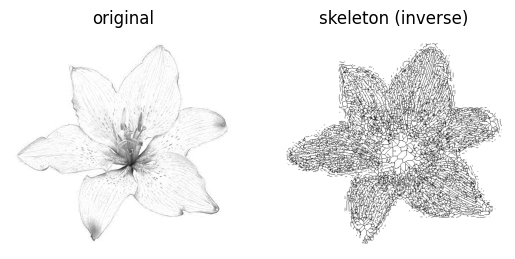

In [ ]:
from skimage import io
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

# read image
img = io.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg')[...,0]

# Note: we want the black bits to be True, so use <
binary = img < filters.threshold_triangle(img)

# skeletonize image
skeleton = skeletonize(binary)

# print images
fig, ax = plt.subplots(1, 2)

ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()

# note the reversed colormap, gray_r
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()

plt.show()

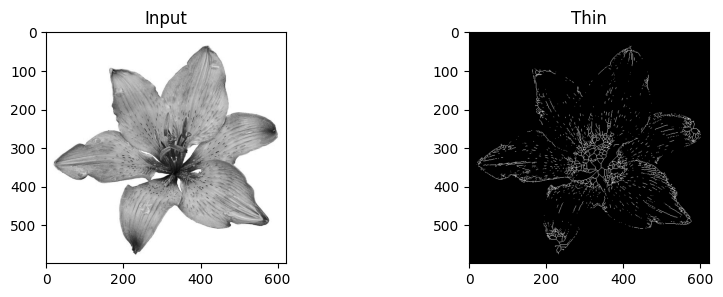

In [ ]:
from skimage import img_as_float
from skimage import io, color, morphology
import matplotlib.pyplot as plt

image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg')))
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')

plt.savefig('/tmp/char_out.png')
plt.show()

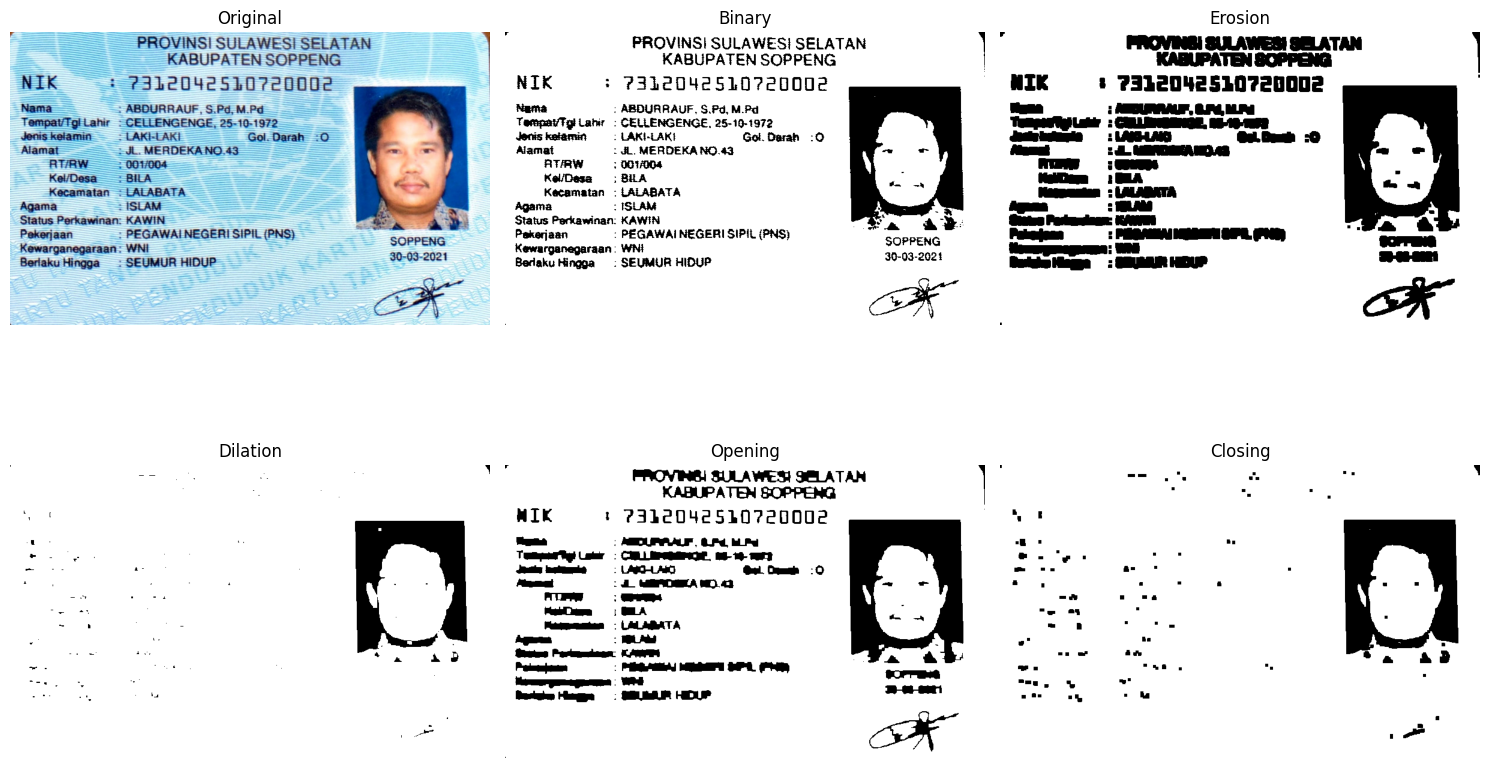


Analisis binary:
Pixel putih: 332387
Pixel hitam: 58013
Rasio putih: 85.14%

Analisis erosion:
Pixel putih: 282124
Pixel hitam: 108276
Rasio putih: 72.27%

Analisis dilation:
Pixel putih: 368508
Pixel hitam: 21892
Rasio putih: 94.39%

Analisis opening:
Pixel putih: 320419
Pixel hitam: 69981
Rasio putih: 82.07%

Analisis closing:
Pixel putih: 360385
Pixel hitam: 30015
Rasio putih: 92.31%


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    """
    Membaca dan mengkonversi gambar ke grayscale
    """
    # Membaca gambar
    img = cv2.imread(image_path)
    # Konversi ke grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Konversi ke binary menggunakan threshold
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    return img, binary

def apply_basic_morphology(image):
    """
    Menerapkan operasi morfologi dasar pada citra
    """
    # Membuat kernel
    kernel = np.ones((5,5), np.uint8)

    # 1. Erosi
    erosion = cv2.erode(image, kernel, iterations=1)

    # 2. Dilasi
    dilation = cv2.dilate(image, kernel, iterations=1)

    # 3. Opening (Erosi diikuti Dilasi)
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

    # 4. Closing (Dilasi diikuti Erosi)
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

    return erosion, dilation, opening, closing

def display_results(original, binary, erosion, dilation, opening, closing):
    """
    Menampilkan hasil semua operasi morfologi
    """
    plt.figure(figsize=(15,10))

    # Original Image
    plt.subplot(231)
    plt.title('Original')
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Binary Image
    plt.subplot(232)
    plt.title('Binary')
    plt.imshow(binary, cmap='gray')
    plt.axis('off')

    # Erosion
    plt.subplot(233)
    plt.title('Erosion')
    plt.imshow(erosion, cmap='gray')
    plt.axis('off')

    # Dilation
    plt.subplot(234)
    plt.title('Dilation')
    plt.imshow(dilation, cmap='gray')
    plt.axis('off')

    # Opening
    plt.subplot(235)
    plt.title('Opening')
    plt.imshow(opening, cmap='gray')
    plt.axis('off')

    # Closing
    plt.subplot(236)
    plt.title('Closing')
    plt.imshow(closing, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def process_ktp_morphology(image_path):
    """
    Fungsi utama untuk memproses KTP dengan operasi morfologi
    """
    # Baca gambar dan konversi ke binary
    original, binary = load_image(image_path)

    # Terapkan operasi morfologi
    erosion, dilation, opening, closing = apply_basic_morphology(binary)

    # Tampilkan hasil
    display_results(original, binary, erosion, dilation, opening, closing)

    return {
        'binary': binary,
        'erosion': erosion,
        'dilation': dilation,
        'opening': opening,
        'closing': closing
    }

# Fungsi untuk menganalisis hasil
def analyze_results(results):
    """
    Menganalisis hasil operasi morfologi
    """
    analysis = {}

    for operation, image in results.items():
        # Hitung pixel putih
        white_pixels = np.sum(image == 255)
        # Hitung pixel hitam
        black_pixels = np.sum(image == 0)
        # Hitung rasio pixel putih terhadap total
        white_ratio = white_pixels / (white_pixels + black_pixels)

        analysis[operation] = {
            'white_pixels': white_pixels,
            'black_pixels': black_pixels,
            'white_ratio': white_ratio
        }

    return analysis

image_path = '/content/drive/MyDrive/PCVK/Images/ktp dummy.jpeg'
results = process_ktp_morphology(image_path)
# Untuk menganalisis hasil
analysis = analyze_results(results)

# Melihat hasil analisis untuk setiap operasi
for operation, metrics in analysis.items():
    print(f"\nAnalisis {operation}:")
    print(f"Pixel putih: {metrics['white_pixels']}")
    print(f"Pixel hitam: {metrics['black_pixels']}")
    print(f"Rasio putih: {metrics['white_ratio']:.2%}")

